
IMDB Datasets

In [16]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [17]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [18]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 14ms/step - loss: 0.6007 - acc: 0.6620 - val_loss: 0.3956 - val_acc: 0.8625
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.3816 - acc: 0.8458 - val_loss: 0.3011 - val_acc: 0.8806
Epoch 3/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2821 - acc: 0.8975 - val_loss: 0.2868 - val_acc: 0.8880
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2239 - acc: 0.9208 - val_loss: 0.2860 - val_acc: 0.8818
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 0.1879 - acc: 0.9329 - val_loss: 0.3153 - val_acc: 0.8878


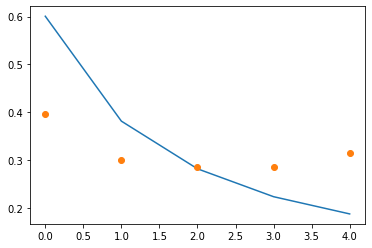

In [20]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [21]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3282 - acc: 0.8805


IMDB Classification using simple RNN

In [36]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


In [37]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [38]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정

In [39]:
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['acc'])

In [40]:
rnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          1568      
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 162,369
Trainable params: 162,369
Non-trainable params: 0
________________________________________________

In [41]:
history=rnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 61ms/step - loss: 0.7138 - acc: 0.5124 - val_loss: 0.6770 - val_acc: 0.5542
Epoch 2/10
157/157 [==============================] - 9s 59ms/step - loss: 0.5288 - acc: 0.7300 - val_loss: 0.4050 - val_acc: 0.8254
Epoch 3/10
157/157 [==============================] - 9s 60ms/step - loss: 0.3366 - acc: 0.8613 - val_loss: 0.3982 - val_acc: 0.8244
Epoch 4/10
157/157 [==============================] - 10s 61ms/step - loss: 0.2618 - acc: 0.9003 - val_loss: 0.4249 - val_acc: 0.8236
Epoch 5/10
157/157 [==============================] - 9s 59ms/step - loss: 0.1983 - acc: 0.9280 - val_loss: 0.4571 - val_acc: 0.8322
Epoch 6/10
157/157 [==============================] - 9s 58ms/step - loss: 0.1285 - acc: 0.9571 - val_loss: 0.5824 - val_acc: 0.8260
Epoch 7/10
157/157 [==============================] - 9s 57ms/step - loss: 0.0816 - acc: 0.9742 - val_loss: 0.6203 - val_acc: 0.8228
Epoch 8/10
157/157 [==============================] - 9s 57ms/step 

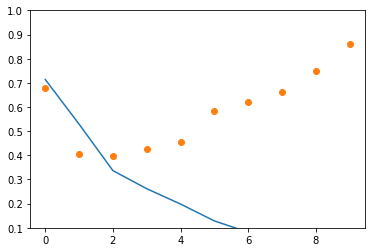

In [42]:
loss=history.history['loss']
val=history.history['val_loss']
plt.ylim(0.1)
plt.plot(loss)
plt.plot(val,'o')

In [43]:
y1=rnn.predict(X_train).flatten()
y2=y_train

In [44]:
np.mean(np.abs(y1-y2))

0.04603489715695381